# 20기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()
# df.shape



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 전처리, 모델생성, 평가


In [2]:
# del [userId,productId]
# gender = onehot encoding and stand
# age = onehot and stand
# occupation = stand
# city = target
# stay in = stand
# marital = onehot and stand
# product1 = stand
# prod2,3 = stand after 0
# purchase = stand

In [3]:
df.drop(columns = ['User_ID', 'Product_ID'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      4998 non-null   object 
 1   Age                         4998 non-null   object 
 2   Occupation                  4998 non-null   int64  
 3   City_Category               4998 non-null   object 
 4   Stay_In_Current_City_Years  4998 non-null   object 
 5   Marital_Status              4998 non-null   int64  
 6   Product_Category_1          4998 non-null   int64  
 7   Product_Category_2          3465 non-null   float64
 8   Product_Category_3          1544 non-null   float64
 9   Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 429.5+ KB


In [4]:
df.Product_Category_2.fillna(0,inplace = True)
df.Product_Category_3.fillna(0,inplace = True)
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,3,0,5,17.0,0.0,2010
1,F,0-17,10,A,1,0,7,0.0,0.0,4483
2,F,0-17,10,A,1,0,1,4.0,0.0,7696
3,F,0-17,10,A,3,0,2,4.0,0.0,16429
4,F,0-17,10,A,3,0,3,5.0,0.0,5780
...,...,...,...,...,...,...,...,...,...,...
4993,M,55+,7,C,1,1,1,16.0,0.0,11701
4994,M,55+,1,C,1,1,8,0.0,0.0,2045
4995,M,55+,13,C,3,1,1,6.0,14.0,4505
4996,M,55+,0,C,2,1,12,0.0,0.0,1413


In [5]:
print(df.Gender.unique())
print(df.Age.unique())
print(df.Marital_Status.unique())

['F' 'M']
['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
[0 1]


In [6]:
df_pre = pd.get_dummies(df,columns = ['Gender','Age'],drop_first = True).copy()
# df_pre[df_pre.Stay_In_Current_City_Years=='4+'].Stay_In_Current_City_Years = 4
df_pre['Stay_In_Current_City_Years'] = df_pre['Stay_In_Current_City_Years'].replace('4+', '4')
df_pre['Stay_In_Current_City_Years'] = df_pre['Stay_In_Current_City_Years'].astype(np.float64)
# print(df_pre.shape)
df_pre

,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,10,A,3.0,0,5,17.0,0.0,2010,0,0,0,0,0,0,0
1,10,A,1.0,0,7,0.0,0.0,4483,0,0,0,0,0,0,0
2,10,A,1.0,0,1,4.0,0.0,7696,0,0,0,0,0,0,0
3,10,A,3.0,0,2,4.0,0.0,16429,0,0,0,0,0,0,0
4,10,A,3.0,0,3,5.0,0.0,5780,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,7,C,1.0,1,1,16.0,0.0,11701,1,0,0,0,0,0,1
4994,1,C,1.0,1,8,0.0,0.0,2045,1,0,0,0,0,0,1
4995,13,C,3.0,1,1,6.0,14.0,4505,1,0,0,0,0,0,1
4996,0,C,2.0,1,12,0.0,0.0,1413,1,0,0,0,0,0,1


In [7]:
y = df_pre['City_Category'].copy()
x = df_pre.drop(columns = 'City_Category')
x

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,10,3.0,0,5,17.0,0.0,2010,0,0,0,0,0,0,0
1,10,1.0,0,7,0.0,0.0,4483,0,0,0,0,0,0,0
2,10,1.0,0,1,4.0,0.0,7696,0,0,0,0,0,0,0
3,10,3.0,0,2,4.0,0.0,16429,0,0,0,0,0,0,0
4,10,3.0,0,3,5.0,0.0,5780,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,7,1.0,1,1,16.0,0.0,11701,1,0,0,0,0,0,1
4994,1,1.0,1,8,0.0,0.0,2045,1,0,0,0,0,0,1
4995,13,3.0,1,1,6.0,14.0,4505,1,0,0,0,0,0,1
4996,0,2.0,1,12,0.0,0.0,1413,1,0,0,0,0,0,1


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True,test_size = 0.2)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
x_train

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
42,10,3.0,0,8,14.0,0.0,9898,0,0,0,0,0,0,0
2117,16,2.0,1,1,8.0,16.0,12067,1,0,1,0,0,0,0
4393,0,1.0,0,5,14.0,0.0,8634,1,0,0,0,1,0,0
289,4,3.0,0,5,0.0,0.0,7137,0,1,0,0,0,0,0
1817,1,2.0,1,5,14.0,0.0,5229,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,16,2.0,1,8,13.0,15.0,10065,1,0,1,0,0,0,0
2394,3,3.0,1,8,15.0,16.0,9755,1,0,1,0,0,0,0
3321,17,1.0,0,8,13.0,0.0,5953,1,0,0,1,0,0,0
4459,16,3.0,0,6,8.0,0.0,16138,0,0,0,0,0,1,0


In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,10,3.0,0,5,17.0,0.0,2010,0,0,0,0,0,0,0
1,10,1.0,0,7,0.0,0.0,4483,0,0,0,0,0,0,0
2,10,1.0,0,1,4.0,0.0,7696,0,0,0,0,0,0,0
3,10,3.0,0,2,4.0,0.0,16429,0,0,0,0,0,0,0
4,10,3.0,0,3,5.0,0.0,5780,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,7,1.0,1,1,16.0,0.0,11701,1,0,0,0,0,0,1
4994,1,1.0,1,8,0.0,0.0,2045,1,0,0,0,0,0,1
4995,13,3.0,1,1,6.0,14.0,4505,1,0,0,0,0,0,1
4996,0,2.0,1,12,0.0,0.0,1413,1,0,0,0,0,0,1


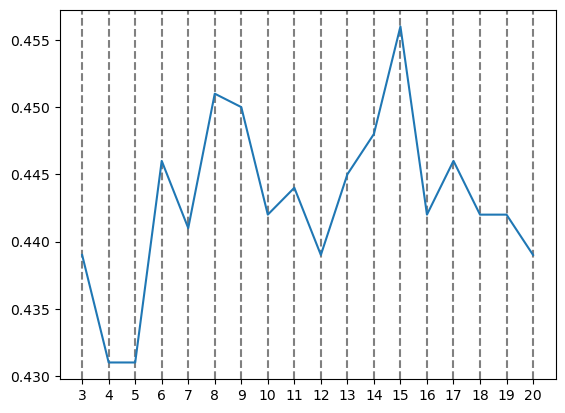

In [28]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
result =list()
line = range(3,21)
for i in line:
    myknn = KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    myknn.fit(x_train,y_train)
    acc = myknn.score(x_test,y_test)
    result.append(acc)

plt.xticks(line)
for xc in line:
    plt.axvline(x=xc, color='gray', linestyle='--')
plt.plot(line,result)
# k=15 is the best